# Heart Disease Prediction using BLR

#### Background:
In recent years, the field of healthcare has seen a significant transformation with the advent of data science. Data science in healthcare involves the application of statistical methods, machine learning techniques, and computational algorithms to analyze and interpret complex healthcare data. 

The dataset originally comes from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to collect data on the health status of U.S. residents. As described by the CDC: "Established in 1984 with 15 states, BRFSS now collects data in all 50 states, the District of Columbia, and three U.S. territories. 


#### Attributes:

###### Demographic:
    BMI: Body Mass Index(Numeric)
    Sex: male or female(Nominal)
    Age: Age of the patient(Categorical)
    Race: Black or White(Factor)

    

###### Behavioral:

    Smoker: whether or not the patient is a current smoker (Factor) Values: `Yes` or `no`
    Does a patient consume alcohol: (Factor) Values: `Yes` or `no`
    Difficulty Walking: (Factor) Values: `Yes` or `no`
    Physical activity such as running, walking, skipping, etc: (Factor) Values: `Yes` or `no
    Average Sleep time in hours: (Numeric)
    
    
###### Information on medical history:

    Physical Health: For how many days during the past 30 days was your physical health not good? (Numeric)
    Mental Health: For how many days during the past 30 days was your mental health not good? (Numeric)
    General Health: General health of the patient.(Factor)
    Asthma: Whether a patient is suffering from Asthma. (Factor) Values: `Yes` or `no
    Kidney Disease: Whether a patient has kidney disease (Factor) Values: `Yes` or `no
    Skin Cancer: Whether a patient has skin cancer (Factor) Values: `Yes` or `no
    Stroke: Whether a patient has any stroke (Factor) Values: `Yes` or `no
    Diabetic: Whether a patient is suffering from diabetes. (Factor) Values: `Yes` or `no , Yes(during pregnancy), No, borderline 
   
    
###### Information on current medical condition:

    This dataset set contains information of patients who are suffering from heart disease
    Heart Disease: Whether patient is suffering from a heart disease (Factor) Values: `Yes` or `no
    
    
    
###### Target variable to predict:
Heart Disease as it associates to various factors such as demographics, medical history and behaviour - (binary: “1”, means “Yes”, “0” means “No”)


STEP 1:

Data Management and Exploratoray Data Analysis


In [76]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os
os.chdir(r"C:\Users\willi\GitHub\Capstone_Project\data\raw")

In [77]:
# Load Datasets

BH = pd.read_csv('Behaviour.csv')
DG = pd.read_csv('Demographics.csv')
HeartD = pd.read_csv('Heart Disease.csv')
MedicalH = pd.read_csv('Medical History.csv')
print("✅ Datasets Loaded Successfully")



✅ Datasets Loaded Successfully


In [78]:
# Check the shape of the datasets

print("Shape of Behaviour Dataset:", BH.shape)
print("Shape of Demographics Dataset:", DG.shape)   
print("Shape of Heart Disease Dataset:", HeartD.shape)
print("Shape of Medical History Dataset:", MedicalH.shape)

Shape of Behaviour Dataset: (319795, 6)
Shape of Demographics Dataset: (319795, 5)
Shape of Heart Disease Dataset: (319795, 2)
Shape of Medical History Dataset: (319795, 9)


In [79]:
# Preview Data Structure

print("\n--- Behaviour Info ---")
BH.info()

print("\n--- Demographics Info ---")
DG.info()

print("\n--- Heart Disease Info ---")
HeartD.info()

print("\n--- Medical History Info ---")
MedicalH.info()





--- Behaviour Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   pid               319795 non-null  object
 1   Smoking           319795 non-null  object
 2   AlcoholDrinking   319795 non-null  object
 3   DiffWalking       319795 non-null  object
 4   PhysicalActivity  319795 non-null  object
 5   SleepTime         319795 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 14.6+ MB

--- Demographics Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   pid          319795 non-null  object 
 1   BMI          319795 non-null  float64
 2   Sex          319795 non-null  object 
 3   AgeCategory  319795 non-null  object 
 4   Race         319795 non-null  object 
d

In [80]:
# Count Missing Values

print("Missing in Demographics:\n", DG.isnull().sum())
print("\nMissing in Medical History:\n", MedicalH.isnull().sum())
print("\nMissing in Behaviour:\n", BH.isnull().sum())
print("\nMissing in Heart Disease:\n", HeartD.isnull().sum())


Missing in Demographics:
 pid            0
BMI            0
Sex            0
AgeCategory    0
Race           0
dtype: int64

Missing in Medical History:
 pid               0
PhysicalHealth    0
MentalHealth      0
GenHealth         0
Asthma            0
KidneyDisease     0
SkinCancer        0
Stroke            0
Diabetic          0
dtype: int64

Missing in Behaviour:
 pid                 0
Smoking             0
AlcoholDrinking     0
DiffWalking         0
PhysicalActivity    0
SleepTime           0
dtype: int64

Missing in Heart Disease:
 pid             0
HeartDisease    0
dtype: int64


In [81]:
# Check for Duplicates

print("Duplicates in Demographics:", DG.duplicated().sum())
print("Duplicates in Medical History:", MedicalH.duplicated().sum())
print("Duplicates in Behaviour:", BH.duplicated().sum())
print("Duplicates in Heart Disease:", HeartD.duplicated().sum())


Duplicates in Demographics: 0
Duplicates in Medical History: 0
Duplicates in Behaviour: 0
Duplicates in Heart Disease: 0


Summary

In [82]:
# Summary view of the datasets


summary = pd.DataFrame({
    "Dataset": ["Demographics", "Medical History", "Behaviour", "Heart Disease"],
    "Rows": [DG.shape[0], MedicalH.shape[0], BH.shape[0], HeartD.shape[0]],
    "Columns": [DG.shape[1], MedicalH.shape[1], BH.shape[1], HeartD.shape[1]],
    "Duplicates": [
        DG.duplicated().sum(),
        MedicalH.duplicated().sum(),
        BH.duplicated().sum(),
        HeartD.duplicated().sum()
    ]
})
summary


,Dataset,Rows,Columns,Duplicates
0,Demographics,319795,5,0
1,Medical History,319795,9,0
2,Behaviour,319795,6,0
3,Heart Disease,319795,2,0


# Step 2: Merge Datasets 

All 4 data sets will be merged into one Master dataset for EDA and cleaning. Variables will be examined and  based on their association with the target variable they will either be kept or dropped.

All datasets have `pid` Patient ID column. We shall use and execute an inner merge to keep only the records present in all datasets.

In [83]:
# Merge Demographics and Behaviour on pid

df_1 = pd.merge(DG,BH, on="pid", how="inner")

# Merge result with Medical History
df_2 = pd.merge(df_1, MedicalH, on="pid", how="inner")

# Merge second result with Heart Disease
master_data = pd.merge(df_2, HeartD, on="pid", how="inner")

print("✅ Datasets Merged Successfully")

✅ Datasets Merged Successfully


Inspect the master dataset

In [84]:
# Shape and columns
print("Shape of master dataset:", master_data.shape)
print("Columns in master dataset:", master_data.columns.tolist())

# Preview first few rows
master_data.head(15)


Shape of master dataset: (319795, 19)
Columns in master dataset: ['pid', 'BMI', 'Sex', 'AgeCategory', 'Race', 'Smoking', 'AlcoholDrinking', 'DiffWalking', 'PhysicalActivity', 'SleepTime', 'PhysicalHealth', 'MentalHealth', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer', 'Stroke', 'Diabetic', 'HeartDisease']


,pid,BMI,Sex,AgeCategory,Race,Smoking,AlcoholDrinking,DiffWalking,PhysicalActivity,SleepTime,PhysicalHealth,MentalHealth,GenHealth,Asthma,KidneyDisease,SkinCancer,Stroke,Diabetic,HeartDisease
0,PID-01,16.60,Female,55-59,White,Yes,No,No,Yes,5,3,30,Very good,Yes,No,Yes,No,Yes,No
1,PID-02,20.34,Female,80 or older,White,No,No,No,Yes,7,0,0,Very good,No,No,No,Yes,No,No
2,PID-03,26.58,Male,65-69,White,Yes,No,No,Yes,8,20,30,Fair,Yes,No,No,No,Yes,No
3,PID-04,24.21,Female,75-79,White,No,No,No,No,6,0,0,Good,No,No,Yes,No,No,No
4,PID-05,23.71,Female,40-44,White,No,No,Yes,Yes,8,28,0,Very good,No,No,No,No,No,No
5,PID-06,28.87,Female,75-79,Black,Yes,No,Yes,No,12,6,0,Fair,No,No,No,No,No,Yes
6,PID-07,21.63,Female,70-74,White,No,No,No,Yes,4,15,0,Fair,Yes,No,Yes,No,No,No
7,PID-08,31.64,Female,80 or older,White,Yes,No,Yes,No,9,5,0,Good,Yes,No,No,No,Yes,No
8,PID-09,26.45,Female,80 or older,White,No,No,No,No,5,0,0,Fair,No,Yes,No,No,"No, borderline diabetes",No
9,PID-10,40.69,Male,65-69,White,No,No,Yes,Yes,10,0,0,Good,No,No,No,No,No,No


After reviewing all the column's it has been resolved that for now we keep all of them as all columns have a percieved correlation to heart disease.

# Step 3: Summary Table

We shall proceed to create a summary table of each variable to understand its values, variation, missing data, inconsistent data etc.

In [85]:
# Descriptive Summary of the master dataset
summary_stats = master_data.describe(include='all').transpose()
summary_stats['missing'] = master_data.isnull().sum()
summary_stats['unique'] = master_data.nunique()

print("\n--- Descriptive Summary of Master Dataset ---\n",summary_stats)


--- Descriptive Summary of Master Dataset ---
                      count  unique         top    freq       mean       std  \
pid                 319795  319795  PID-319795       1        NaN       NaN   
BMI               319795.0    3604         NaN     NaN  28.325399    6.3561   
Sex                 319795       2      Female  167805        NaN       NaN   
AgeCategory         319795      13       65-69   34151        NaN       NaN   
Race                319795       6       White  245212        NaN       NaN   
Smoking             319795       2          No  187887        NaN       NaN   
AlcoholDrinking     319795       2          No  298018        NaN       NaN   
DiffWalking         319795       2          No  275385        NaN       NaN   
PhysicalActivity    319795       2         Yes  247957        NaN       NaN   
SleepTime         319795.0      24         NaN     NaN   7.097075  1.436007   
PhysicalHealth    319795.0      31         NaN     NaN    3.37171   7.95085   
Ment

In [87]:
print(master_data.head(5))

      pid    BMI     Sex  AgeCategory   Race Smoking AlcoholDrinking  \
0  PID-01  16.60  Female        55-59  White     Yes              No   
1  PID-02  20.34  Female  80 or older  White      No              No   
2  PID-03  26.58    Male        65-69  White     Yes              No   
3  PID-04  24.21  Female        75-79  White      No              No   
4  PID-05  23.71  Female        40-44  White      No              No   

  DiffWalking PhysicalActivity  SleepTime  PhysicalHealth  MentalHealth  \
0          No              Yes          5               3            30   
1          No              Yes          7               0             0   
2          No              Yes          8              20            30   
3          No               No          6               0             0   
4         Yes              Yes          8              28             0   

   GenHealth Asthma KidneyDisease SkinCancer Stroke Diabetic HeartDisease  
0  Very good    Yes            No       

#### Preparing the Data for Analysis

###### Seeing as this is a Binary Logistic Regression model we are trying to create we shall re=code all the variables so that they can be numerically encoded

In [66]:
# Check for unique values in each column.

for col in master_data.columns:
    print(f"{col}: {master_data[col].unique()}")


pid: ['PID-01' 'PID-02' 'PID-03' ... 'PID-319793' 'PID-319794' 'PID-319795']
BMI: [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Sex: ['Female' 'Male']
AgeCategory: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Smoking: ['Yes' 'No']
AlcoholDrinking: ['No' 'Yes']
DiffWalking: ['No' 'Yes']
PhysicalActivity: ['Yes' 'No']
SleepTime: [ 5  7  8  6 12  4  9 10 15  3  2  1 16 18 14 20 11 13 17 24 19 21 22 23]
PhysicalHealth: [ 3  0 20 28  6 15  5 30  7  1  2 21  4 10 14 18  8 25 16 29 27 17 24 12
 23 26 22 19  9 13 11]
MentalHealth: [30  0  2  5 15  8  4  3 10 14 20  1  7 24  9 28 16 12  6 25 17 18 21 29
 22 13 23 27 26 11 19]
GenHealth: ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Asthma: ['Yes' 'No']
KidneyDisease: ['No' 'Yes']
SkinCancer: ['Yes' 'No']
Stroke: ['No' 'Yes']
Diabetic: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']

#### <ins>Conversion Approach:</ins>

Binary Yes/No columns to `1/0`

Sex to `1` for Male and `0` for Female

Multi-category columns like `Race`, `GenHealth`, etc., to numeric codes using `.astype('category').cat.codes`

In [88]:
# Recode Binary Variables

binary_vars = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
               'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer', 'HeartDisease']
master_data[binary_vars] = master_data[binary_vars].apply(lambda col: col.map({'Yes': 1, 'No': 0}))




In [89]:
# Re-Code Sex variable

master_data['Sex'] = master_data['Sex'].map({'Male': 1, 'Female': 0})



In [90]:
# Recode 'AgeCategory' Ordinally

age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49',
             '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']
age_map = {age: idx for idx, age in enumerate(age_order)}
master_data['AgeCategory'] = master_data['AgeCategory'].map(age_map)



In [91]:
# Bin the  BMI variable into standard categories

def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

master_data['BMI_Category'] = master_data['BMI'].apply(bmi_category)


In [92]:
# Bin SleepTime

def sleep_category(sleep):
    if sleep < 5:
        return 'Very Low'
    elif 5 <= sleep < 7:
        return 'Low'
    elif 7 <= sleep <= 9:
        return 'Optimal'
    else:
        return 'High'

master_data['Sleep_Category'] = master_data['SleepTime'].apply(sleep_category)


In [93]:
# One hot encode Race variable

race_dummies = pd.get_dummies(master_data['Race'], prefix='Race')
master_data = pd.concat([master_data.drop(columns='Race'), race_dummies], axis=1)


In [95]:
# Preview the transformed dataset

master_data.head(20)

,pid,BMI,Sex,AgeCategory,Smoking,AlcoholDrinking,DiffWalking,PhysicalActivity,SleepTime,PhysicalHealth,...,Diabetic,HeartDisease,BMI_Category,Sleep_Category,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,PID-01,16.60,0,7,1,0,0,1,5,3,...,1.0,0,Underweight,Low,False,False,False,False,False,True
1,PID-02,20.34,0,12,0,0,0,1,7,0,...,0.0,0,Normal,Optimal,False,False,False,False,False,True
2,PID-03,26.58,1,9,1,0,0,1,8,20,...,1.0,0,Overweight,Optimal,False,False,False,False,False,True
3,PID-04,24.21,0,11,0,0,0,0,6,0,...,0.0,0,Normal,Low,False,False,False,False,False,True
4,PID-05,23.71,0,4,0,0,1,1,8,28,...,0.0,0,Normal,Optimal,False,False,False,False,False,True
5,PID-06,28.87,0,11,1,0,1,0,12,6,...,0.0,1,Overweight,High,False,False,True,False,False,False
6,PID-07,21.63,0,10,0,0,0,1,4,15,...,0.0,0,Normal,Very Low,False,False,False,False,False,True
7,PID-08,31.64,0,12,1,0,1,0,9,5,...,1.0,0,Obese,Optimal,False,False,False,False,False,True
8,PID-09,26.45,0,12,0,0,0,0,5,0,...,NaN,0,Overweight,Low,False,False,False,False,False,True
9,PID-10,40.69,1,9,0,0,1,1,10,0,...,0.0,0,Obese,High,False,False,False,False,False,True


In [96]:
# Save Re-coded master dataset to CSV

os.chdir(r"C:\Users\willi\GitHub\Capstone_Project\data\processed")


In [97]:
master_data.to_csv("master_data_recoded.csv", index=False)
print("✅ Master dataset saved as 'master_data_recoded.csv' in processed data folder.")

✅ Master dataset saved as 'master_data_recoded.csv' in processed data folder.


### <ins>Overall Heart Disease Rate</ins>

In [99]:
# Load Data
master_data_recoded = pd.read_csv("master_data_recoded.csv")

In [100]:
# Preview structure to reveal how many people have (1) and do not have (0) heart disease.

print(master_data_recoded['HeartDisease'].value_counts())


HeartDisease
0    292422
1     27373
Name: count, dtype: int64


In [101]:
# Total number of entries
total = len(master_data_recoded)

# Count of people with heart disease
heart_disease_count = master_data_recoded['HeartDisease'].sum()

# Calculate the rate
heart_disease_rate = heart_disease_count / total

print(f"Heart Disease Rate: {heart_disease_rate:.2%}")



Heart Disease Rate: 8.56%


#### <ins>Plot of Heart Disease rate</ins>

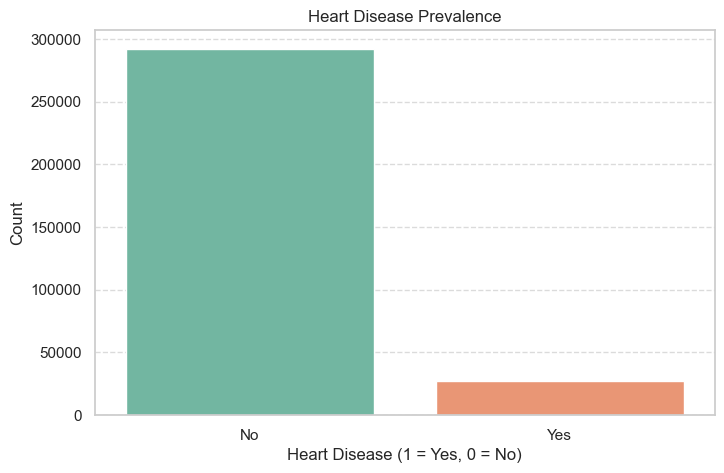

In [105]:
# Plot bar chart of heart disease prevalence
plt.figure(figsize=(8, 5))
sns.countplot(x='HeartDisease', data=master_data_recoded, palette='Set2')
plt.title('Heart Disease Prevalence')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()